# Data in Deep Learning

## Working With Training Set

In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
from torchvision.transforms import transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [24]:
train_set = torchvision.datasets.FashionMNIST(
    root='./data/FashionMNIST',
    train=True,
    download=True,
    transform=transforms.Compose([
        transforms.ToTensor()
    ])
)
train_loader = torch.utils.data.DataLoader(train_set,
                                      batch_size=1000,
                                      shuffle=True)

### Balanced Datasets

In [9]:
len(train_set)

60000

In [10]:
train_set.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [11]:
train_set.targets.bincount()

tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

### Accesing Data in The Training Set

In [12]:
sample = next(iter(train_set))
len(sample)

2

In [13]:
image,label = sample
print(type(image))
print(type(label))

<class 'torch.Tensor'>
<class 'int'>


In [14]:
image.shape

torch.Size([1, 28, 28])

In [15]:
torch.tensor(label).shape

torch.Size([])

In [16]:
image.squeeze().shape

torch.Size([28, 28])

tensor(9)

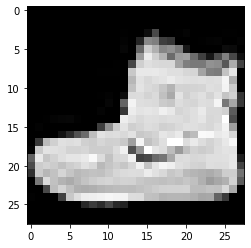

In [17]:
plt.imshow(image.squeeze(), cmap="gray")
torch.tensor(label)

## Working With Batches of Data

In [18]:
display_loader = torch.utils.data.DataLoader(train_set,
                                            batch_size=10)

In [19]:
batch = next(iter(display_loader))
len(batch)

2

In [20]:
images, labels = batch
print('types:', type(images), type(labels))
print('shapes:', images.shape, labels.shape)

types: <class 'torch.Tensor'> <class 'torch.Tensor'>
shapes: torch.Size([10, 1, 28, 28]) torch.Size([10])


### Show Batch Images

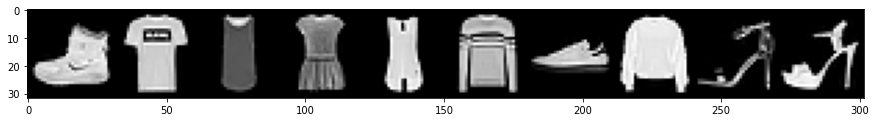

In [21]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15, 15))
plt.imshow(np.transpose(grid, (1,2,0)))

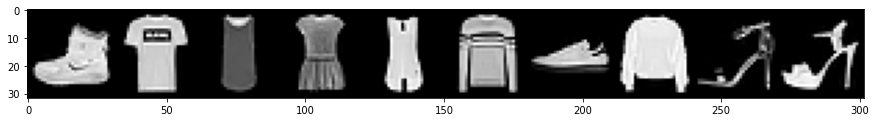

In [22]:
grid = torchvision.utils.make_grid(images, nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(grid.permute(1,2,0))

## Plot Images Using PyTorch DataLoader

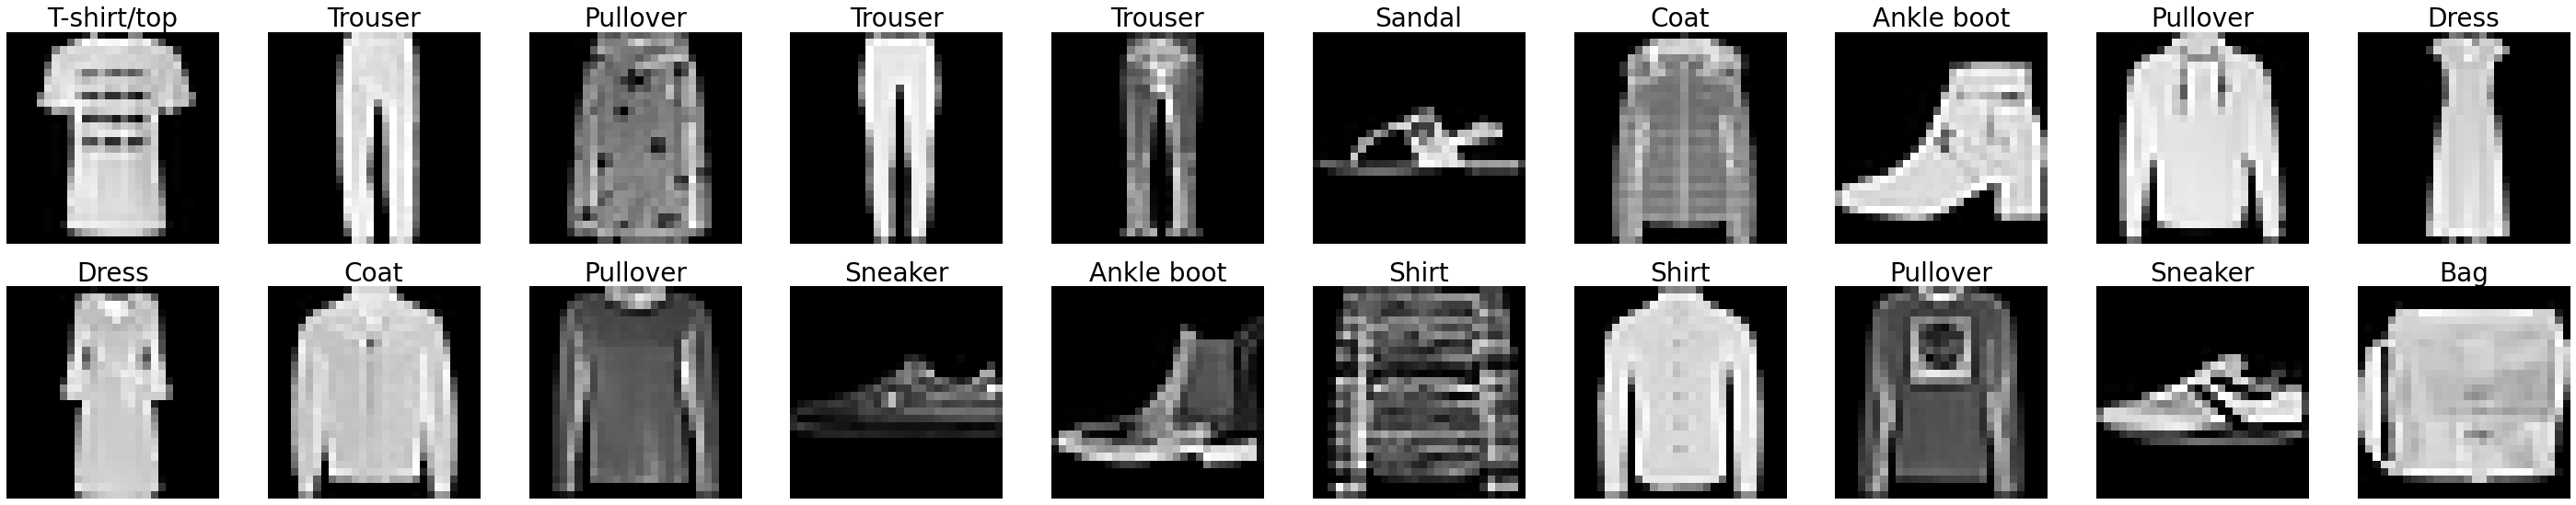

In [23]:
how_many_to_plot = 20
train_loader = torch.utils.data.DataLoader(train_set,
                                          batch_size=1,
                                          shuffle=True)
plt.figure(figsize=(50,50))
for i, batch in enumerate(train_loader, start=1):
    image, label = batch
    plt.subplot(10, 10, i)
    plt.imshow(image.reshape(28,28), cmap='gray')
    plt.axis('off')
    plt.title(train_set.classes[label.item()], fontsize=28)
    if (i >= how_many_to_plot):
        break